# SCC-ICMC-USP - 1st. Semester - 2023
# SCC5948/MAI5024. Data Science - Final Work – **02.** Data Analysis

### Prof. PhD. Roseli Aparecida Francelin Romero

### Monitor: Diogo Godoi

Group Number: 12

Students:

1.   Leandro Marcos da Silva (**13702000**)
2.   Vinícius Andreghetti (**9898012**)

## Installation

In [175]:
# Install ydata-profiling
%pip install ydata_profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Imports

In [176]:
# Imports
from ydata_profiling import ProfileReport

import numpy as np
import pandas as pd
import warnings


# Ignore Pandas warnings
warnings.filterwarnings("ignore")

# Random state default
RANDOM_STATE = 42

## Functions

In [177]:
def function():
    pass

## Report

In [178]:
# Generate and save training data profiling report
profile = ProfileReport(train_df, title="Profiling Report - Train Data")
profile.to_file("report_train_data.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 111.06it/s]


## Main

In [179]:
from pathlib import Path

# General path
path = f'{str(Path.home())}/EvilTwin_detection/'

# Load pre-processed training dataset
test_df = pd.read_csv(path + 'data/pre_processed/test_data.csv')
# Load pre-processed test dataset
train_df = pd.read_csv(path + 'data/pre_processed/train_data.csv')

# Recombining both training and test data to execute data analysis
awid_df = pd.concat([test_df, train_df])

## Dataframe Info

In [180]:
awid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27958 entries, 0 to 3146
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   frame.len               27958 non-null  float64
 1   radiotap.dbm_antsignal  27958 non-null  float64
 2   radiotap.length         27958 non-null  float64
 3   wlan.duration           27958 non-null  float64
 4   wlan.fc.protected_0.0   27958 non-null  float64
 5   wlan.fc.subtype_0.0     27958 non-null  float64
 6   wlan.fc.subtype_12.0    27958 non-null  float64
 7   wlan.fc.subtype_13.0    27958 non-null  float64
 8   wlan.fc.subtype_14.0    27958 non-null  float64
 9   wlan.fc.subtype_15.0    27958 non-null  float64
 10  wlan.fc.subtype_2.0     27958 non-null  float64
 11  wlan.fc.subtype_3.0     27958 non-null  float64
 12  wlan.fc.subtype_4.0     27958 non-null  float64
 13  wlan.fc.subtype_5.0     27958 non-null  float64
 14  wlan.fc.subtype_8.0     27958 non-null 

## Dataframe Description

In [181]:
print(awid_df.describe())

          frame.len  radiotap.dbm_antsignal  radiotap.length  wlan.duration  \
count  27958.000000            27958.000000     27958.000000   27958.000000   
mean       0.074655                0.427583         0.729469       0.021321   
std        0.115183                0.247451         0.249590       0.042656   
min        0.000000                0.017860         0.000000       0.000000   
25%        0.000000                0.209820         0.500000       0.001540   
50%        0.023290                0.325890         0.500000       0.003530   
75%        0.104270                0.660710         1.000000       0.018550   
max        0.865220                1.000000         1.000000       1.000000   

       wlan.fc.protected_0.0  wlan.fc.subtype_0.0  wlan.fc.subtype_12.0  \
count           27958.000000         27958.000000          27958.000000   
mean                0.555619             0.009979              0.004650   
std                 0.496906             0.099398              

In [182]:
from scipy.stats import skew, kurtosis

max_len = max([len(c) for c in awid_df.columns])

print(f'column{(max_len-6)*" "} | average\t|median\t| mode\t| skewness\t| kurtosis\t|'.upper())
print(100*'-')
for c in awid_df:
    print(f'{c}{(max_len-len(c))*" "} | {awid_df[c].mean():.03f}\t| {awid_df[c].median():05.03f}\t| {awid_df[c].mode()[0]:.03f}\t| {skew(awid_df[c]):06.03f}\t| {kurtosis(awid_df[c]):06.03f}\t|')

COLUMN                 | AVERAGE	|MEDIAN	| MODE	| SKEWNESS	| KURTOSIS	|
----------------------------------------------------------------------------------------------------
frame.len              | 0.075	| 0.023	| 0.000	| 01.840	| 03.103	|
radiotap.dbm_antsignal | 0.428	| 0.326	| 0.670	| 00.682	| -0.799	|
radiotap.length        | 0.729	| 0.500	| 0.500	| 00.154	| -1.949	|
wlan.duration          | 0.021	| 0.004	| 0.002	| 05.083	| 57.990	|
wlan.fc.protected_0.0  | 0.556	| 1.000	| 1.000	| -0.224	| -1.950	|
wlan.fc.subtype_0.0    | 0.010	| 0.000	| 0.000	| 09.860	| 95.218	|
wlan.fc.subtype_12.0   | 0.005	| 0.000	| 0.000	| 14.562	| 210.066	|
wlan.fc.subtype_13.0   | 0.002	| 0.000	| 0.000	| 20.667	| 425.125	|
wlan.fc.subtype_14.0   | 0.498	| 0.000	| 0.000	| 00.008	| -2.000	|
wlan.fc.subtype_15.0   | 0.009	| 0.000	| 0.000	| 10.677	| 111.988	|
wlan.fc.subtype_2.0    | 0.001	| 0.000	| 0.000	| 32.132	| 1030.482	|
wlan.fc.subtype_3.0    | 0.147	| 0.000	| 0.000	| 01.993	| 01.972	|
wlan.fc.subtype_4.

## Correlation Matrix

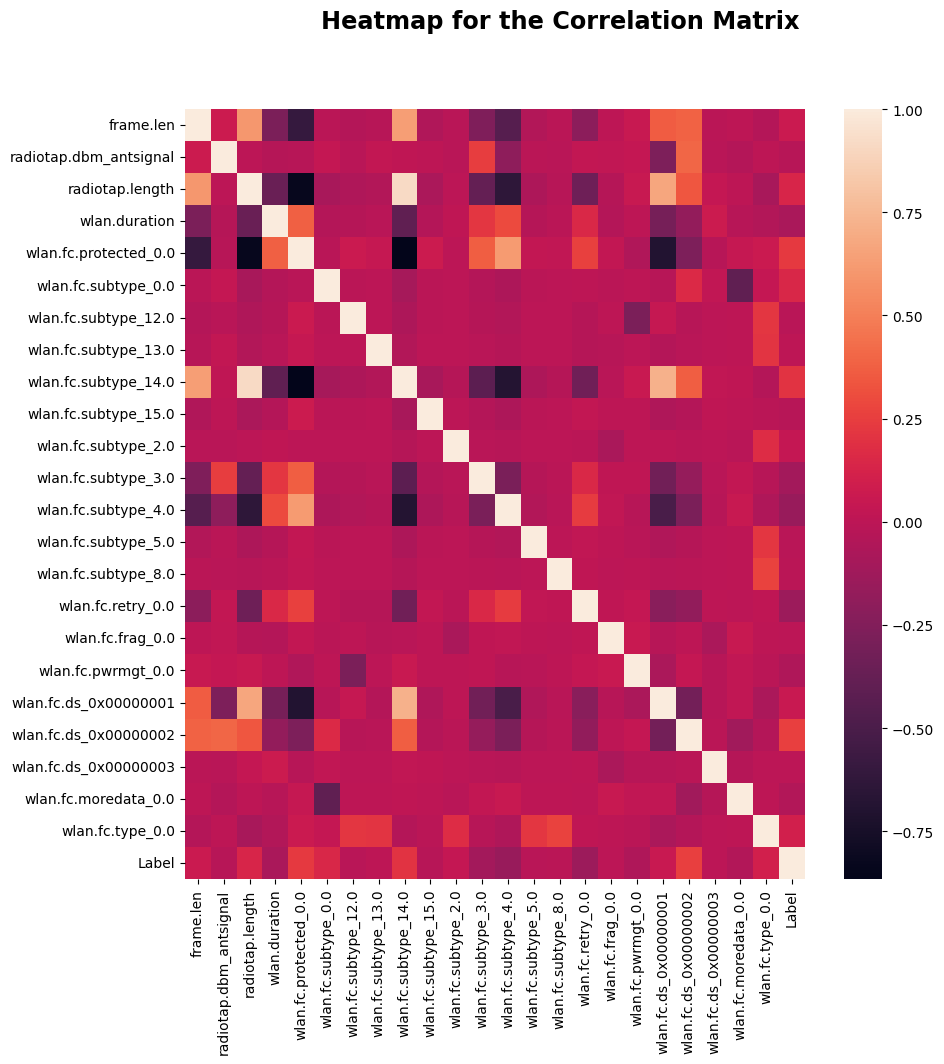

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
awid_cm = awid_df.corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
fig.suptitle("Heatmap for the Correlation Matrix", fontsize='xx-large', fontweight='bold')
__ = sns.heatmap(awid_cm)

In [184]:
# correlation greater than 0.5
threshold = [0.7, 0.5, 0.4]
correlation_classes = ['highly', 'considerably', 'not much']

print(100*'*')
print('Greatest Absolute Correlations on dataset:'.upper())
print(100*'*')

max_len = max([len(c) for c in awid_df.columns])
highly_corr, medium_corr, little_corr = [],[], []
for i, row in enumerate(awid_cm.values):
  for j, corr in enumerate(row):
    if(i>j): # only considerate half of the matrix (redundance)
      i_column_name = awid_df.columns[i]
      j_column_name = awid_df.columns[j]

      if np.abs(corr)>threshold[0]:
        highly_corr.append((i_column_name, j_column_name, corr))
      elif np.abs(corr)>threshold[1]:
        medium_corr.append((i_column_name, j_column_name, corr))
      elif np.abs(corr)>threshold[2]:
        little_corr.append((i_column_name, j_column_name, corr))

print(20*' '+'Highly correlated'.upper())
for corr in highly_corr:
  print(f'{corr[0]}{(max_len-len(corr[0]))*" "}, {corr[1]}{(max_len-len(corr[1]))*" "}:\t{corr[2]:+.03f}')

print(100*'*')
print(15*' '+'Considerably correlated'.upper())
for corr in medium_corr:
  print(f'{corr[0]}{(max_len-len(corr[0]))*" "}, {corr[1]}{(max_len-len(corr[1]))*" "}:\t{corr[2]:+.03f}')

print(100*'*')
print(15*' '+'Not Much correlated'.upper())
for corr in little_corr:
  print(f'{corr[0]}{(max_len-len(corr[0]))*" "}, {corr[1]}{(max_len-len(corr[1]))*" "}:\t{corr[2]:+.03f}')

****************************************************************************************************
GREATEST ABSOLUTE CORRELATIONS ON DATASET:
****************************************************************************************************
                    HIGHLY CORRELATED
wlan.fc.protected_0.0 , radiotap.length       :	-0.835
wlan.fc.subtype_14.0  , radiotap.length       :	+0.917
wlan.fc.subtype_14.0  , wlan.fc.protected_0.0 :	-0.865
wlan.fc.ds_0x00000001 , wlan.fc.subtype_14.0  :	+0.719
****************************************************************************************************
               CONSIDERABLY CORRELATED
radiotap.length       , frame.len             :	+0.606
wlan.fc.protected_0.0 , frame.len             :	-0.597
wlan.fc.subtype_14.0  , frame.len             :	+0.630
wlan.fc.subtype_4.0   , radiotap.length       :	-0.632
wlan.fc.subtype_4.0   , wlan.fc.protected_0.0 :	+0.615
wlan.fc.subtype_4.0   , wlan.fc.subtype_14.0  :	-0.687
wlan.fc.ds_0x00000001 , rad

## Scatter Plot

IndexError: index 16 is out of bounds for axis 0 with size 16

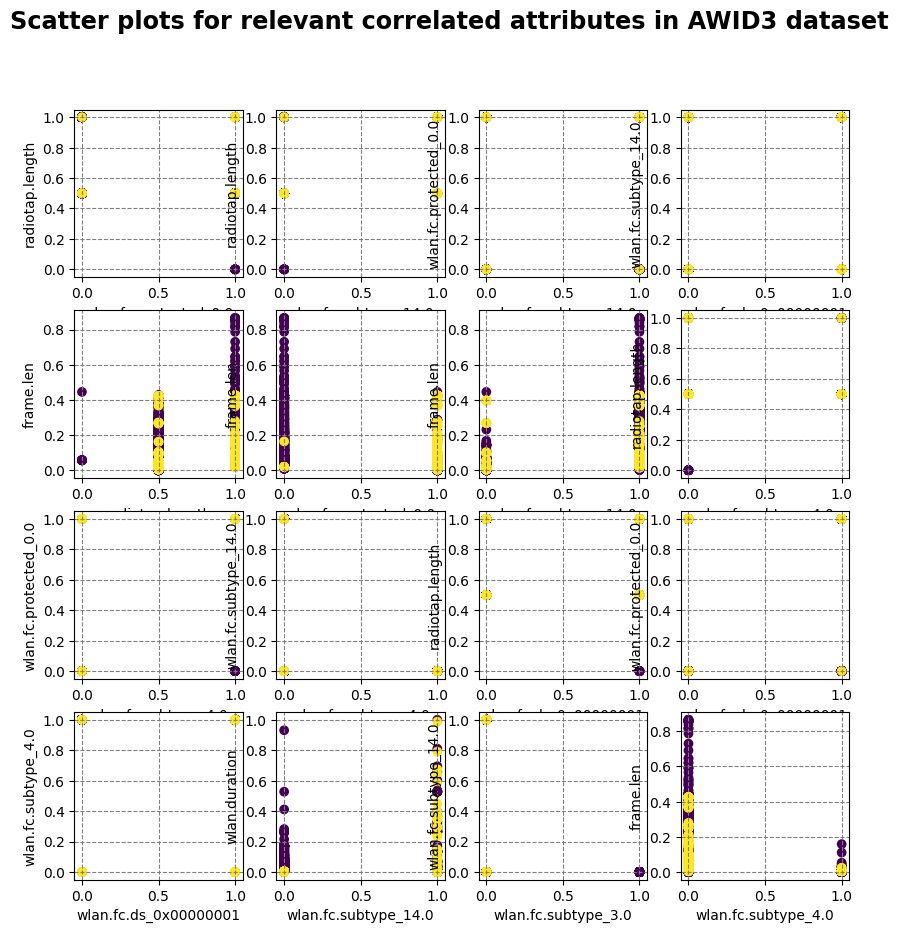

In [185]:
corr = np.concatenate((highly_corr, medium_corr, little_corr))
fig, axs = plt.subplots(len(corr)//4,4, figsize=(10, 10))
axs = axs.ravel()

fig.suptitle("Scatter plots for relevant correlated attributes in AWID3 dataset", fontsize='xx-large', fontweight='bold')
for i, line in enumerate(corr):
    a = axs[i]
    column_1 = list(awid_df[corr[i][0]])
    column_2 = list(awid_df[corr[i][1]])
    a.grid(True)
    a.scatter(column_1, column_2, label=awid_df['Label'], c=awid_df['Label'])
    #a.set_title(f'{corr[i][0]} x {corr[i][1]}')
    a.set_xlabel(f'{corr[i][0]}')
    a.set_ylabel(f'{corr[i][1]}')
plt.tight_layout()

## Histograms

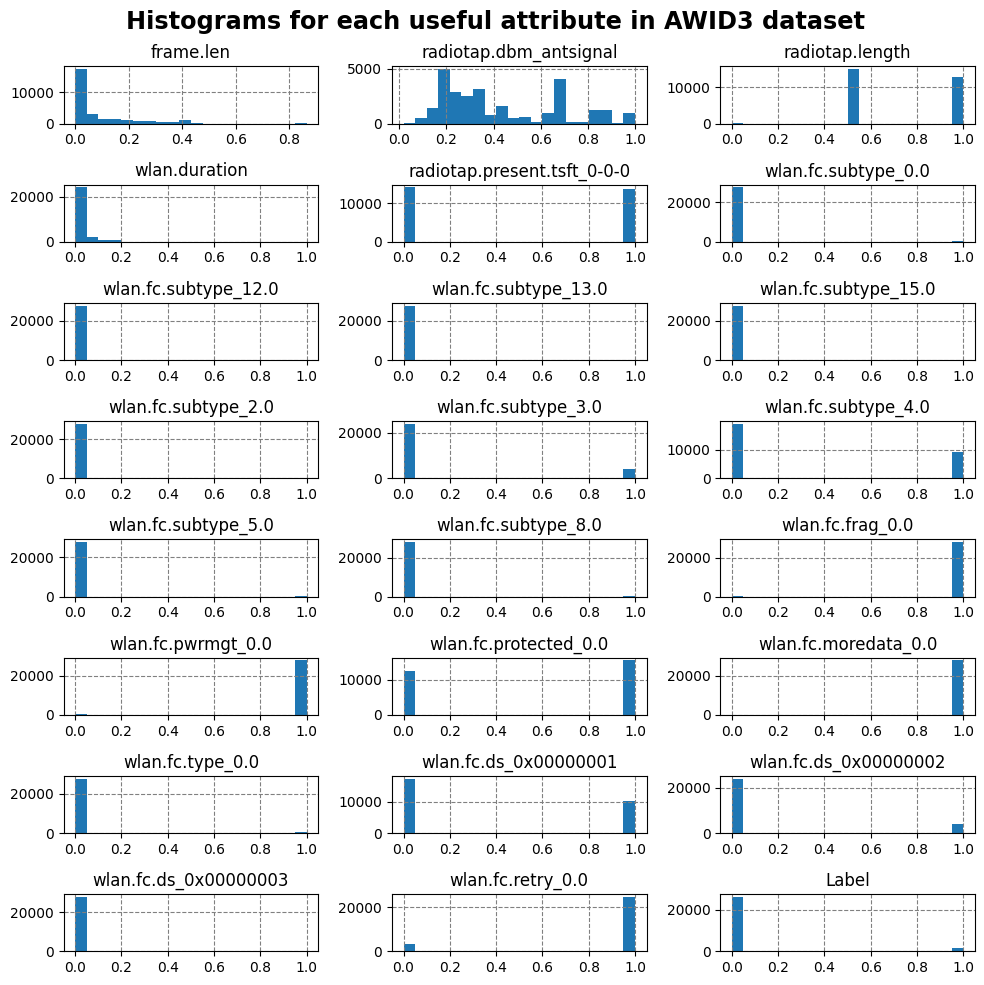

In [ ]:
fig, axs = plt.subplots(len(awid_df.columns)//3,3, figsize=(10, 10))
axs = axs.ravel()

fig.suptitle("Histograms for each useful attribute in AWID3 dataset", fontsize='xx-large', fontweight='bold')
for i, a in enumerate(axs): # plotting each attribute's histogram 
  column_name = awid_df.columns[i]
  a.set_title(column_name)
  plt.rc('grid', linestyle="--", color='gray')
  a.grid(True)
  a.hist(awid_df[column_name], bins=20)
plt.tight_layout()

## Boxplot

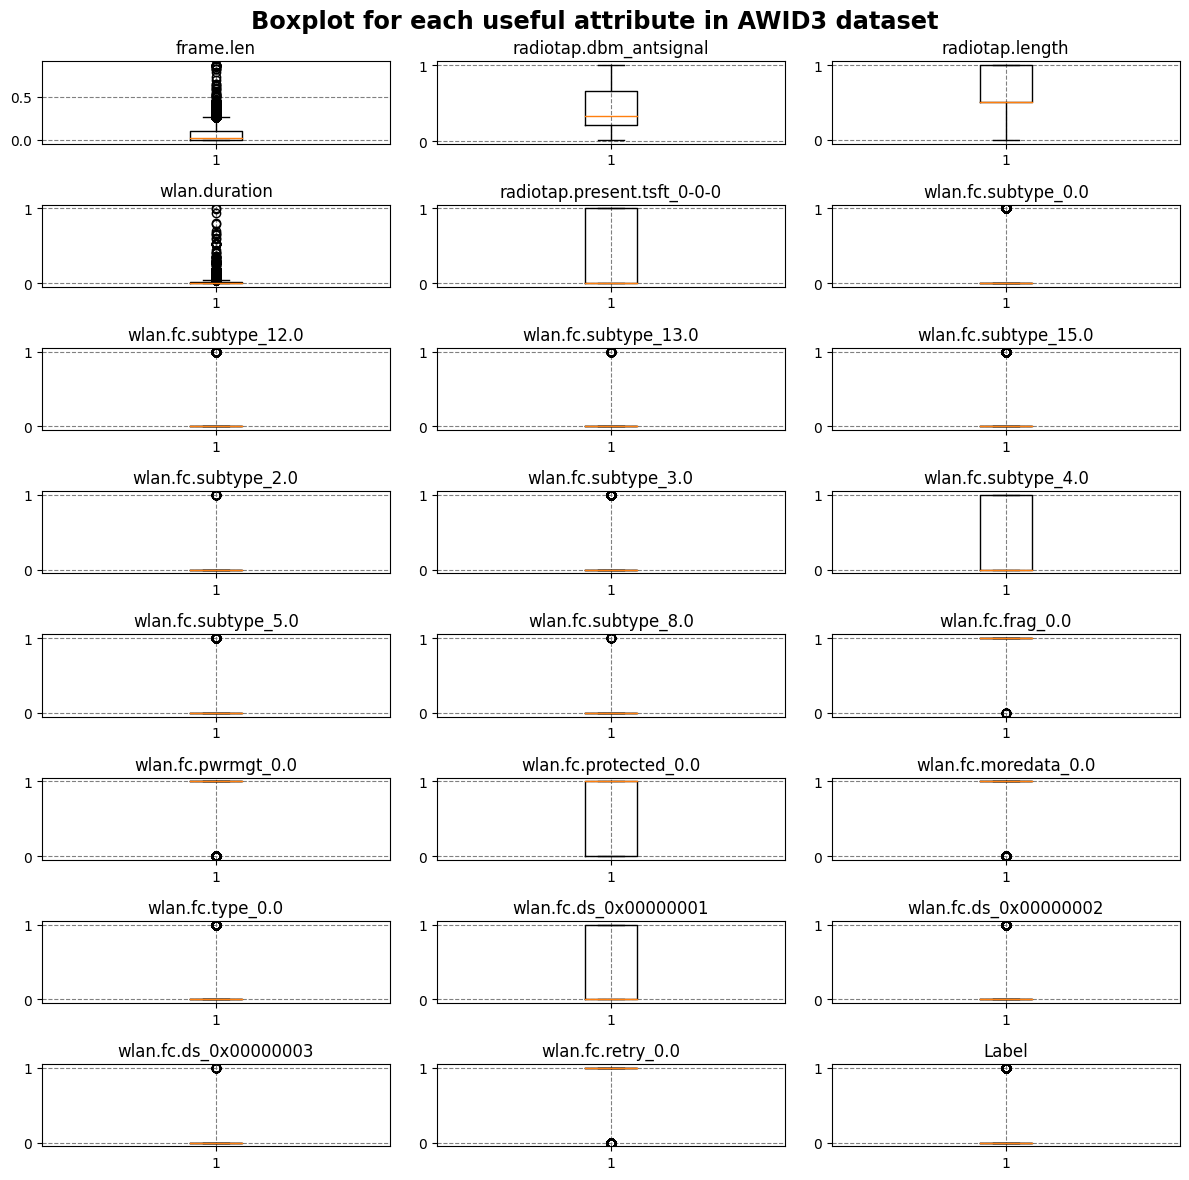

In [ ]:
fig, axs = plt.subplots(len(awid_df.columns)//3,3, figsize=(12, 12))
axs = axs.ravel()

fig.suptitle("Boxplot for each useful attribute in AWID3 dataset", fontsize='xx-large', fontweight='bold')
for i, a in enumerate(axs): # plotting each attribute's histogram 
  column_name = awid_df.columns[i]
  a.set_title(column_name)
  plt.rc('grid', linestyle="--", color='gray')
  a.grid(True)
  a.boxplot(awid_df[column_name])
plt.tight_layout()

## Outliers

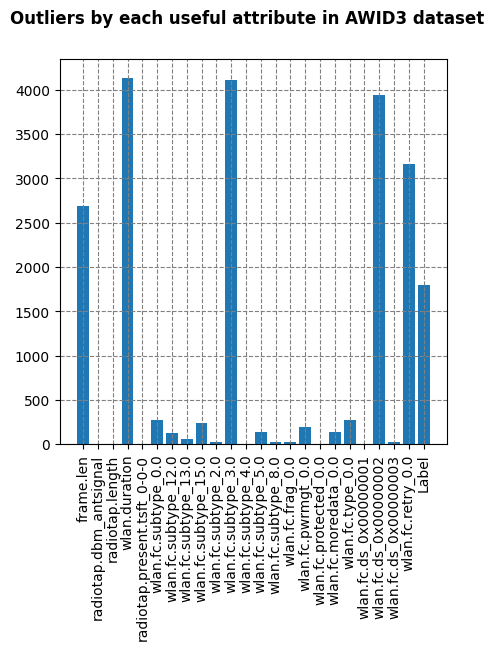

In [ ]:
#Outliers
# Função para encontrar outliers usando Interquartil (IQR)
def encontrar_outliers(df):
    q1 = df.quantile(0.25) # Primeiro quartil
    q3 = df.quantile(0.75) # Terceiro quartil
    iqr = q3 - q1 # Calculando IQR
    
    # Localizando e retornando os outliers
    return df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))]

# Exibindo os outliers de cada atributo
max_len = max([len(c) for c in awid_df.columns])
to_plot = []
for i, c in enumerate(awid_df.columns):
    num_outliers = len(encontrar_outliers(awid_df[c]))
    to_plot.append(num_outliers)

fig, ax = plt.subplots(1,1, figsize=(5, 5))
fig.suptitle("Outliers by each useful attribute in AWID3 dataset", fontsize='large', fontweight='bold')
__ = ax.bar([x for x in range(len(to_plot))], to_plot )
ax.grid(True)
# Set number of ticks for x-axis
__ = ax.set_xticks([x for x in range(len(to_plot))])
# Set ticks labels for x-axis
__ = ax.set_xticklabels(list(awid_df.columns), rotation='vertical')